<IPython.core.display.Javascript object>


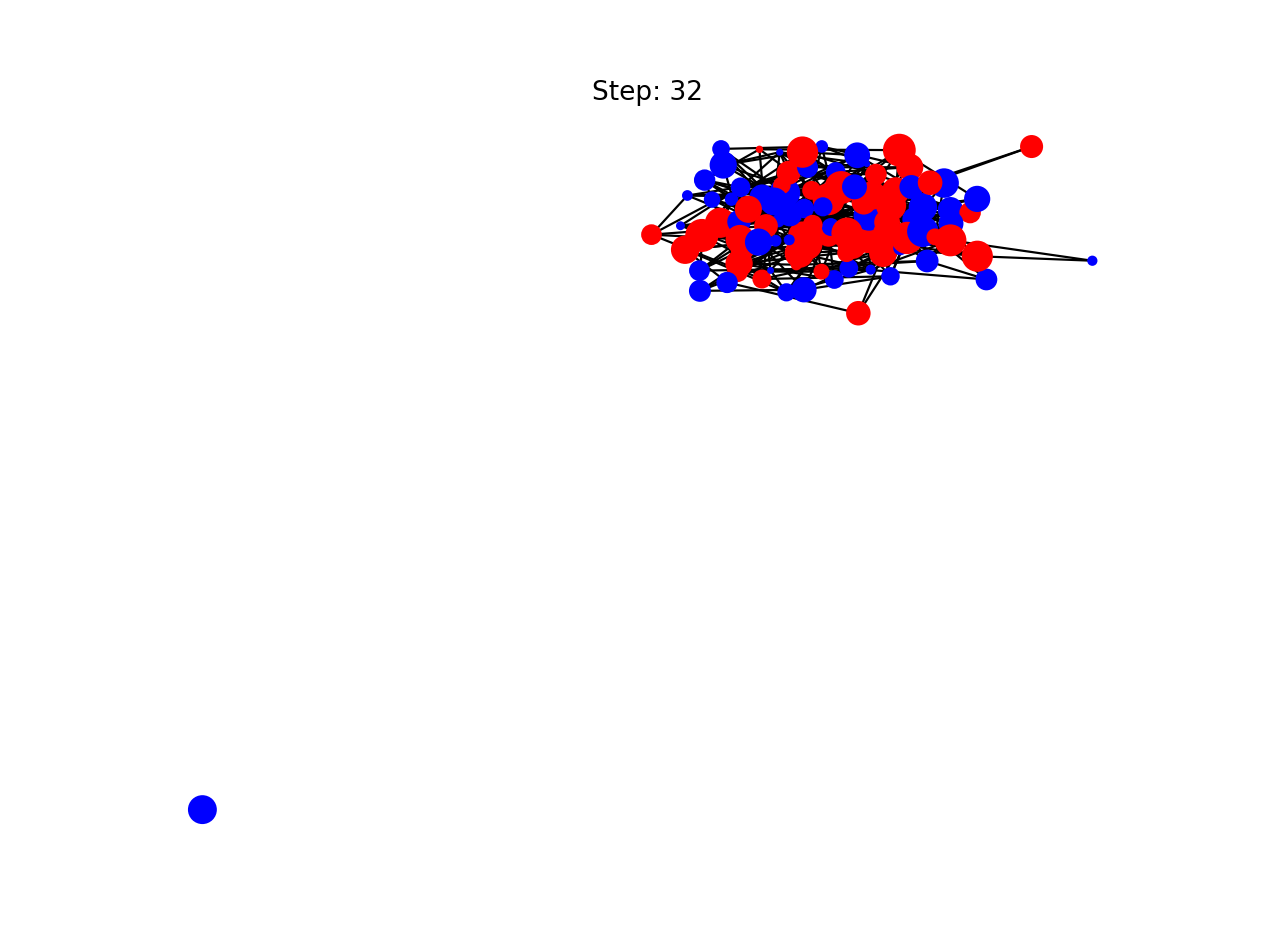

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation

# Parameters for the network
N = 100  # Number of nodes (agents)
p = 0.08  # Probability of edge creation
F = 100  # Fundamental value
initial_price = 105  # Initial price
cp = 0.5  # Sensitivity of price to transaction quantity
timesteps = 50  # Number of timesteps for the animation

# Create a network
G = nx.erdos_renyi_graph(N, p)

# Assign agent types
types = np.random.choice(['fundamentalist', 'imitator'], size=N)
nx.set_node_attributes(G, dict(zip(G.nodes(), types)), 'type')

# Initialize the price list
prices = [initial_price]

# Initialize node positions
pos = nx.spring_layout(G, seed=42)

# Prepare figure for animation
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize attributes for animation
for i in G.nodes():
    G.nodes[i]['transaction_quantity'] = np.random.rand()  # Random initial transaction quantity

def update_network(G, t):
    # Randomly change the transaction quantity for illustration
    for i in G.nodes():
        G.nodes[i]['transaction_quantity'] = np.random.rand()  # Random transaction quantity

def animate(t):
    ax.clear()
    update_network(G, t)
    # Draw the network with node color and size based on 'type' and 'transaction_quantity'
    node_color = ['red' if G.nodes[node]['type'] == 'fundamentalist' else 'blue' for node in G]
    node_size = [G.nodes[node]['transaction_quantity']*200 for node in G]  # Scale node size for visibility
    nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size, ax=ax, with_labels=False)
    ax.set_title(f"Step: {t}")
    plt.axis('off')

# Create the animation
ani = FuncAnimation(fig, animate, frames=range(timesteps), interval=200, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


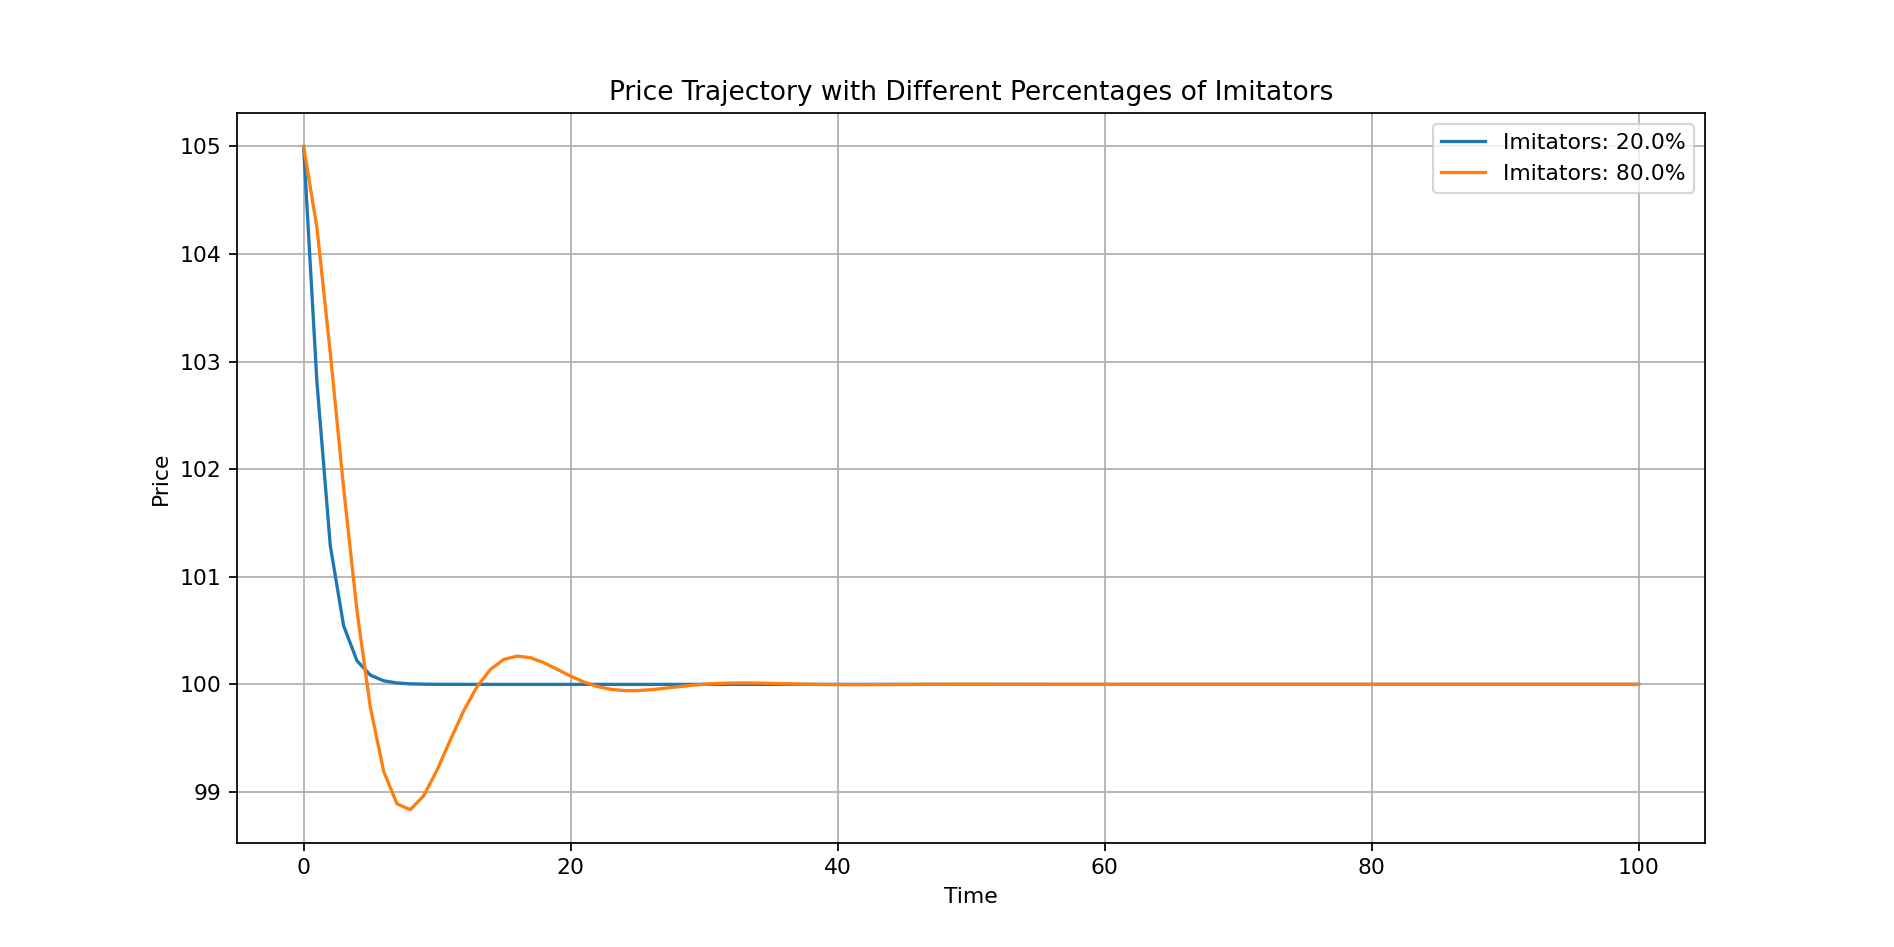

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Parameters for the network
N = 100  # Number of nodes (agents)
p = 0.05  # Probability of edge creation for an Erdős-Rényi graph
F = 100  # Fundamental value
initial_price = 105  # Initial price
cp = 0.5  # Sensitivity of price to transaction quantity
timesteps = 100  # Number of timesteps for the animation
imitator_fraction = [0.2, 0.8]  # Percentage of imitators for two scenarios

# Function to update the network
def update_network(G, prices, F, cp):
    total_transaction_quantity = 0
    for i in G.nodes():
        if G.nodes[i]['type'] == 'fundamentalist':
            G.nodes[i]['transaction_quantity'] = F - prices[-1]
        else:  # Imitator
            neighbors = list(G.neighbors(i))
            neighbor_quantities = [G.nodes[n]['transaction_quantity'] for n in neighbors]
            G.nodes[i]['transaction_quantity'] = np.mean(neighbor_quantities) if neighbors else 0
        total_transaction_quantity += G.nodes[i]['transaction_quantity']

    # Update the price
    new_price = max(prices[-1] + (cp * total_transaction_quantity) / N, 0)  # Ensure price doesn't go negative
    prices.append(new_price)

# Function to run the simulation
def run_simulation(imitator_frac):
    # Create a network
    G = nx.erdos_renyi_graph(N, p)

    # Assign agent types based on the imitator fraction
    types = ['imitator' if np.random.rand() < imitator_frac else 'fundamentalist' for _ in range(N)]
    for i, agent_type in enumerate(types):
        G.nodes[i]['type'] = agent_type
        G.nodes[i]['transaction_quantity'] = 0

    # Initialize the price list
    prices = [initial_price]

    # Run the simulation
    for t in range(timesteps):
        update_network(G, prices, F, cp)

    return prices

# Run simulations for different imitator fractions and plot results
plt.figure(figsize=(12, 6))

for frac in imitator_fraction:
    prices = run_simulation(frac)
    plt.plot(prices, label=f'Imitators: {frac*100}%')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Trajectory with Different Percentages of Imitators')
plt.legend()
plt.grid(True)
plt.show()



<IPython.core.display.Javascript object>


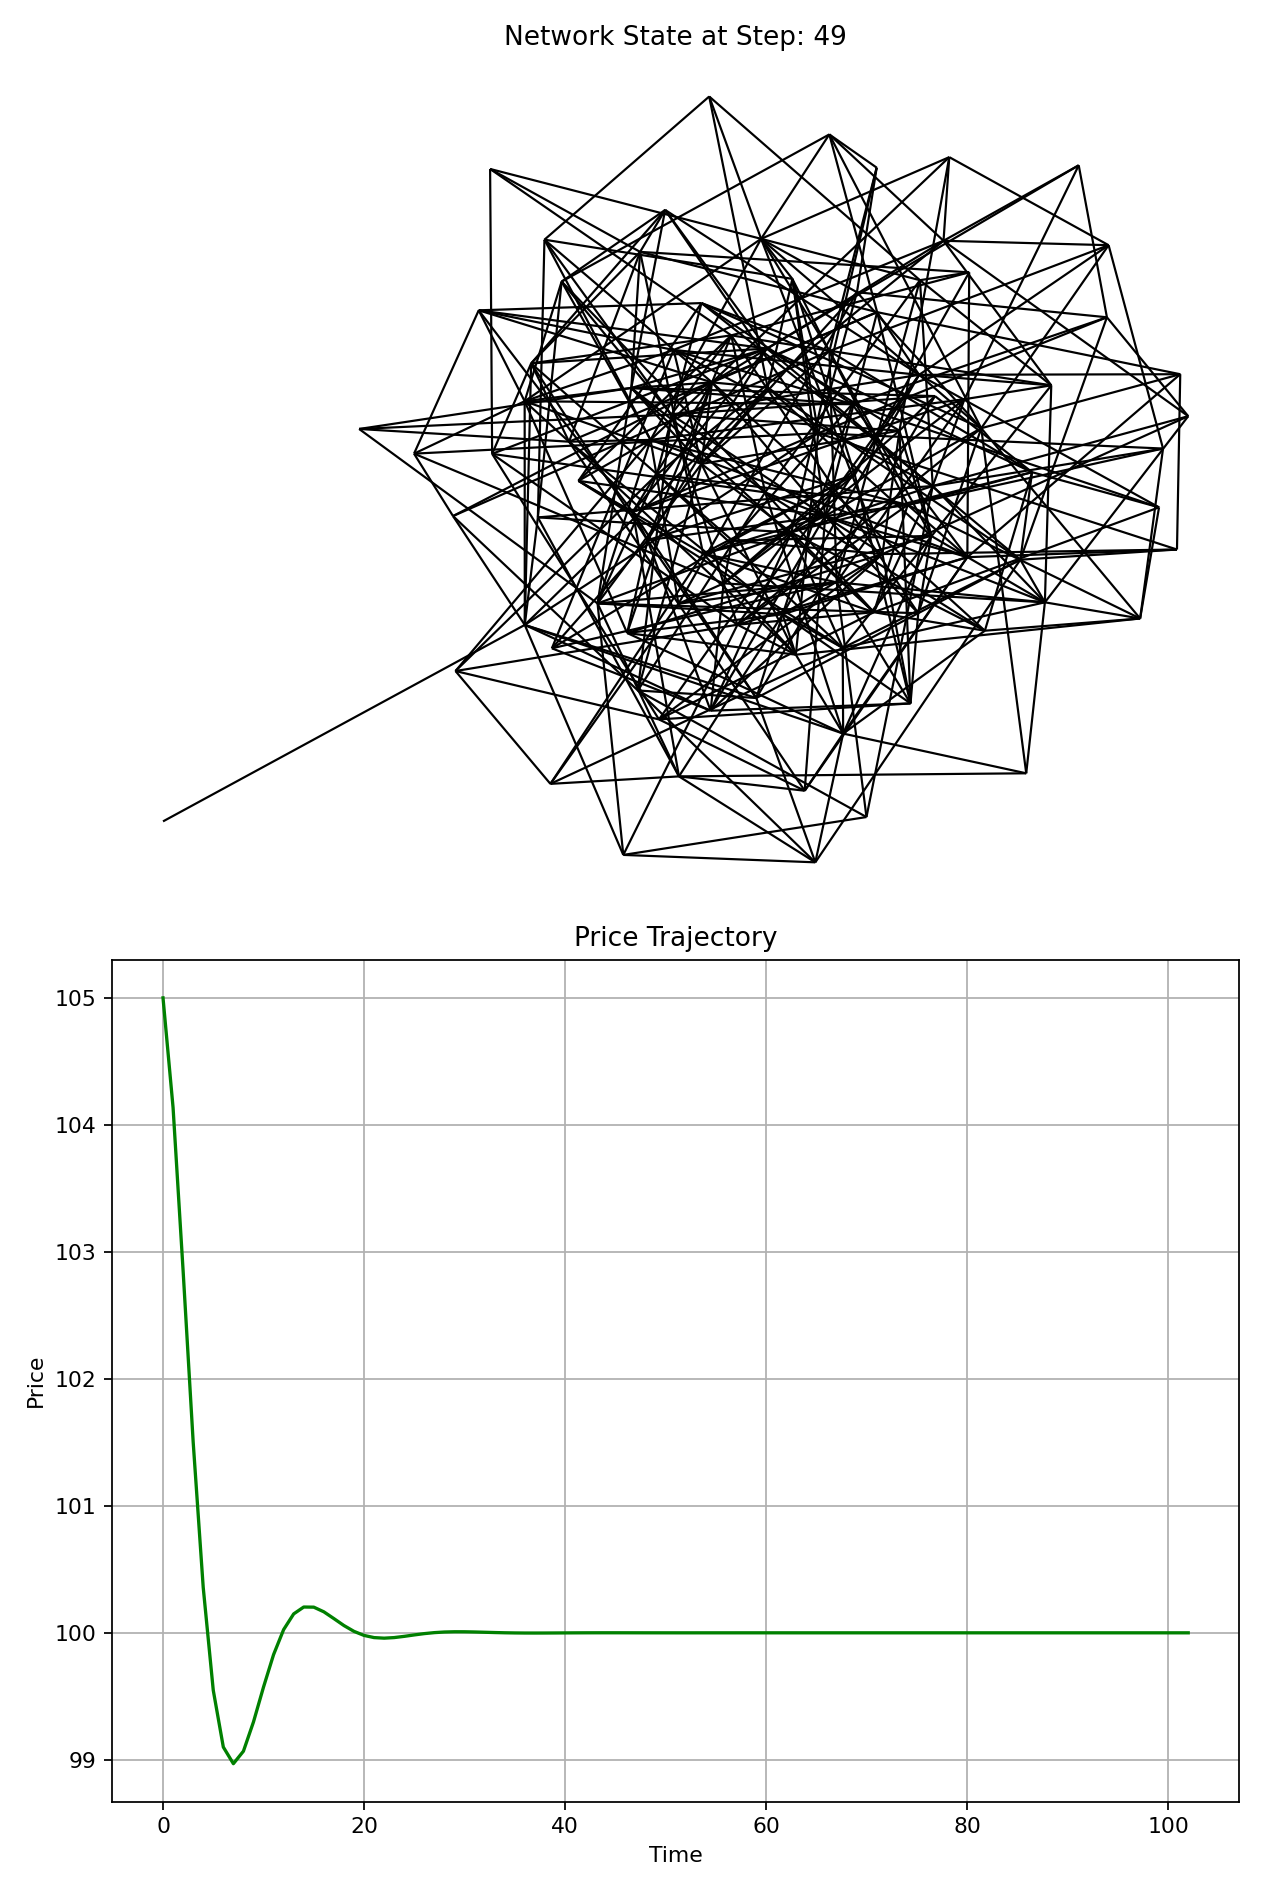

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation

# Parameters for the network
N = 1000  # Number of nodes (agents)
p = 0.08  # Probability of edge creation for an Erdős-Rényi graph
F = 100  # Fundamental value
initial_price = 105  # Initial price
cp = 0.5  # Sensitivity of price to transaction quantity
timesteps = 50  # Number of timesteps for the animation

# Define the imitator fraction
# imitator_fraction = 0.2  # For 20% imitators
imitator_fraction = 0.8  # For 80% imitators

# Create a network
G = nx.erdos_renyi_graph(N, p)

# Assign agent types based on the imitator fraction
types = ['imitator' if np.random.rand() < imitator_fraction else 'fundamentalist' for _ in range(N)]
for i, agent_type in enumerate(types):
    G.nodes[i]['type'] = agent_type
    G.nodes[i]['transaction_quantity'] = 0

# Initialize the price list
prices = [initial_price]

# Prepare figure for animation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Function to update the network
def update_network(G, prices, F, cp):
    total_transaction_quantity = 0
    for i in G.nodes():
        if G.nodes[i]['type'] == 'fundamentalist':
            G.nodes[i]['transaction_quantity'] = F - prices[-1]
        else:  # Imitator
            neighbors = list(G.neighbors(i))
            neighbor_quantities = [G.nodes[n]['transaction_quantity'] for n in neighbors]
            G.nodes[i]['transaction_quantity'] = np.mean(neighbor_quantities) if neighbors else 0
        total_transaction_quantity += G.nodes[i]['transaction_quantity']

    # Update the price 
    new_price = max(prices[-1] + (cp * total_transaction_quantity) / N, 0)  # Ensure price doesn't go negative
    prices.append(new_price)

# Animation function
def animate(t):
    ax1.clear()
    update_network(G, prices, F, cp)
    # Draw the network with node color and size based on 'type' and 'transaction_quantity'
    node_colors = ['red' if G.nodes[node]['type'] == 'fundamentalist' else 'blue' for node in G]
    node_sizes = [G.nodes[node]['transaction_quantity'] * 200 for node in G]  # Scale node sizes for visibility
    nx.draw_networkx(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax1, with_labels=False)
    ax1.set_title(f"Network State at Step: {t}")
    ax1.axis('off')

    # Update and plot price change over time
    ax2.clear()
    ax2.plot(prices, color='green')
    ax2.set_title("Price Trajectory")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Price")
    ax2.grid(True)

# Position the nodes using a spring layout for visual appeal
pos = nx.spring_layout(G)

# Create the animation
ani = FuncAnimation(fig, animate, frames=range(timesteps), interval=200, repeat=False)

# Save the animation as a GIF
ani.save('network_animation_80%.mp4', writer='ffmpeg', fps=5)

plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


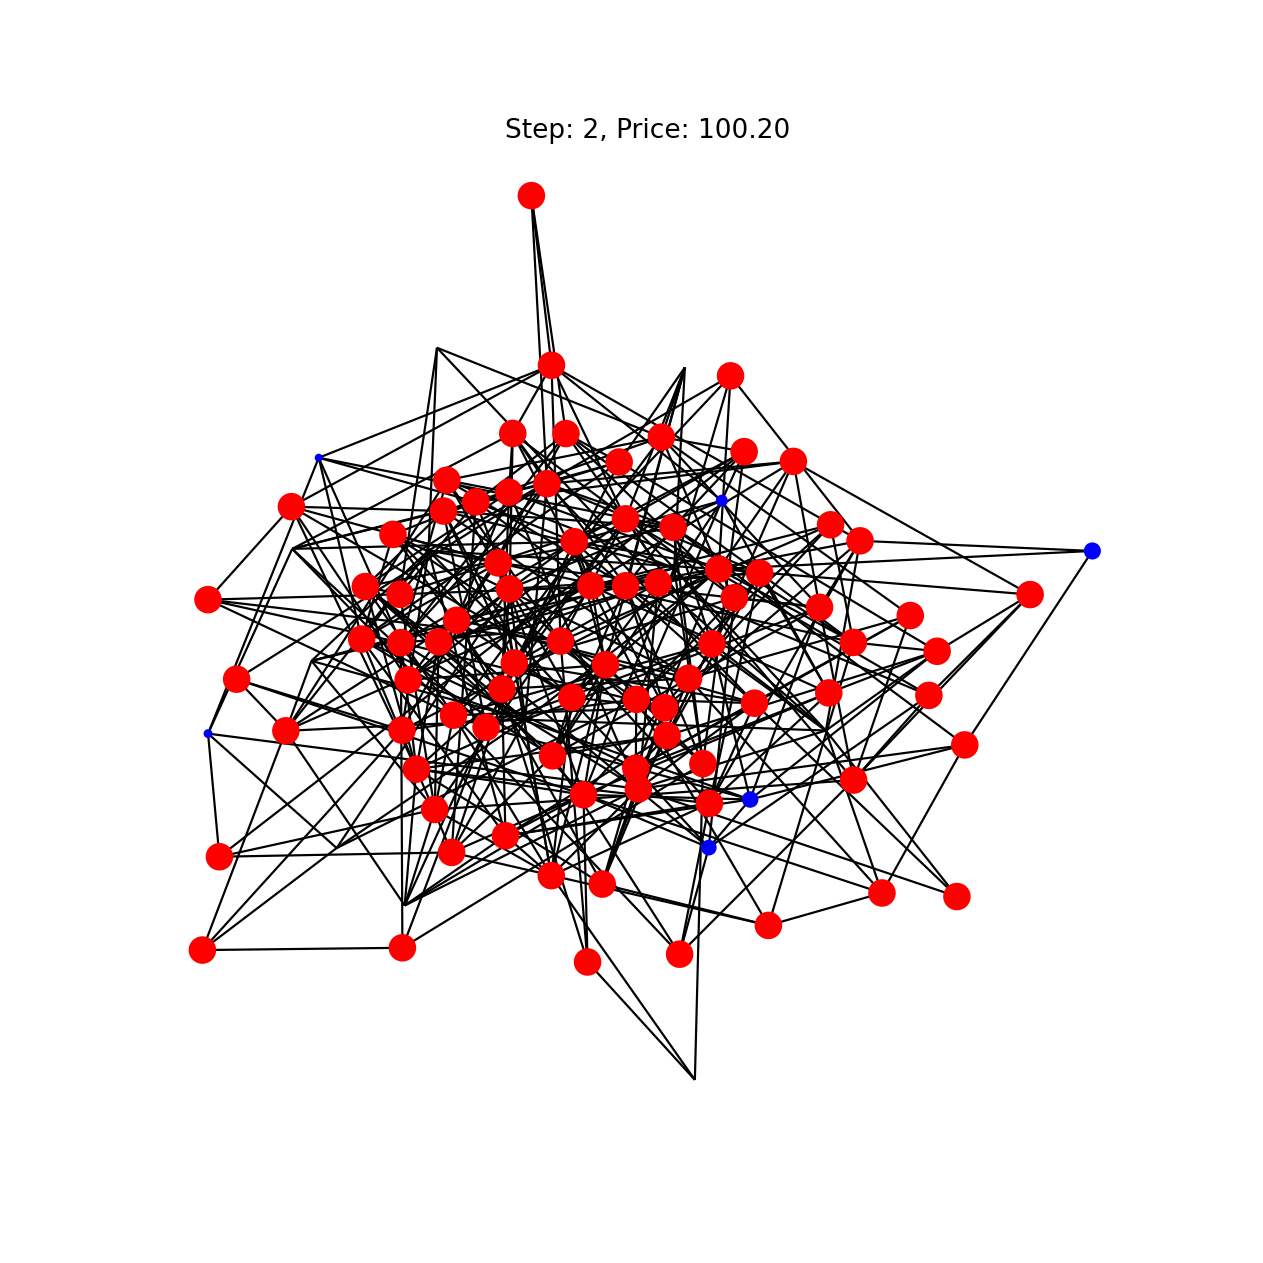

In [23]:
# Parameters for the network
N = 100  # Number of nodes (agents)
p = 0.08  # Probability of edge creation
F = 100  # Fundamental value
initial_price = 100  # Initial price
cp = 0.005  # Sensitivity of price to transaction quantity
timesteps = 50  # Number of timesteps for the animation
c_fu = 0.2  # Sensitivity of fundamentalists to news
c_im = 0.7  # Sensitivity of imitators to news

# Initialize the network and assign agent types
G = nx.erdos_renyi_graph(N, p)
for i in G.nodes():
    G.nodes[i]['type'] = 'imitator' if np.random.rand() < 0.2 else 'fundamentalist'
    G.nodes[i]['transaction_quantity'] = 0

# Initialize the price list
prices = [initial_price]

# Function to update the network with news influence
def update_network(G, prices, F, cp, c_fu, c_im):
    total_transaction_quantity = 0
    news_fu = np.random.randn()  # News for fundamentalists
    news_im = np.random.randn()  # News for imitators

    for i in G.nodes():
        if G.nodes[i]['type'] == 'fundamentalist':
            eta_fu = 1 + c_fu * news_fu
            perceived_F = F * eta_fu
            G.nodes[i]['transaction_quantity'] = perceived_F - prices[-1]
        else:  # Imitator
            neighbors = list(G.neighbors(i))
            eta_im = 1 + c_im * news_im
            if neighbors:
                avg_neighbor_quantity = np.mean([G.nodes[n]['transaction_quantity'] for n in neighbors])
                G.nodes[i]['transaction_quantity'] = avg_neighbor_quantity * eta_im
            else:
                G.nodes[i]['transaction_quantity'] = 0
        total_transaction_quantity += G.nodes[i]['transaction_quantity']

    new_price = max(prices[-1] + (cp * total_transaction_quantity) / N, 0)
    prices.append(new_price)

# Position nodes using a spring layout for visual appeal
pos = nx.spring_layout(G)

# Prepare figure for animation
fig, ax = plt.subplots(figsize=(8, 8))

# Animation function
def animate(t):
    ax.clear()
    update_network(G, prices, F, cp, c_fu, c_im)
    node_colors = ['red' if G.nodes[node]['type'] == 'fundamentalist' else 'blue' for node in G]
    node_sizes = [G.nodes[node]['transaction_quantity'] * 50 for node in G]
    nx.draw_networkx(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax, with_labels=False)
    ax.set_title(f"Step: {t}, Price: {prices[-1]:.2f}")
    plt.axis('off')

# Create the animation
ani = FuncAnimation(fig, animate, frames=range(timesteps), interval=200)

plt.show()
